In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plotpar = {'axes.labelsize': 30,
           'font.size': 30,
           'legend.fontsize': 15,
           'xtick.labelsize': 30,
           'ytick.labelsize': 30,
           'text.usetex': True}
plt.rcParams.update(plotpar)

In [16]:
gaia_mc = pd.read_csv("code/gaia_mc3.csv")

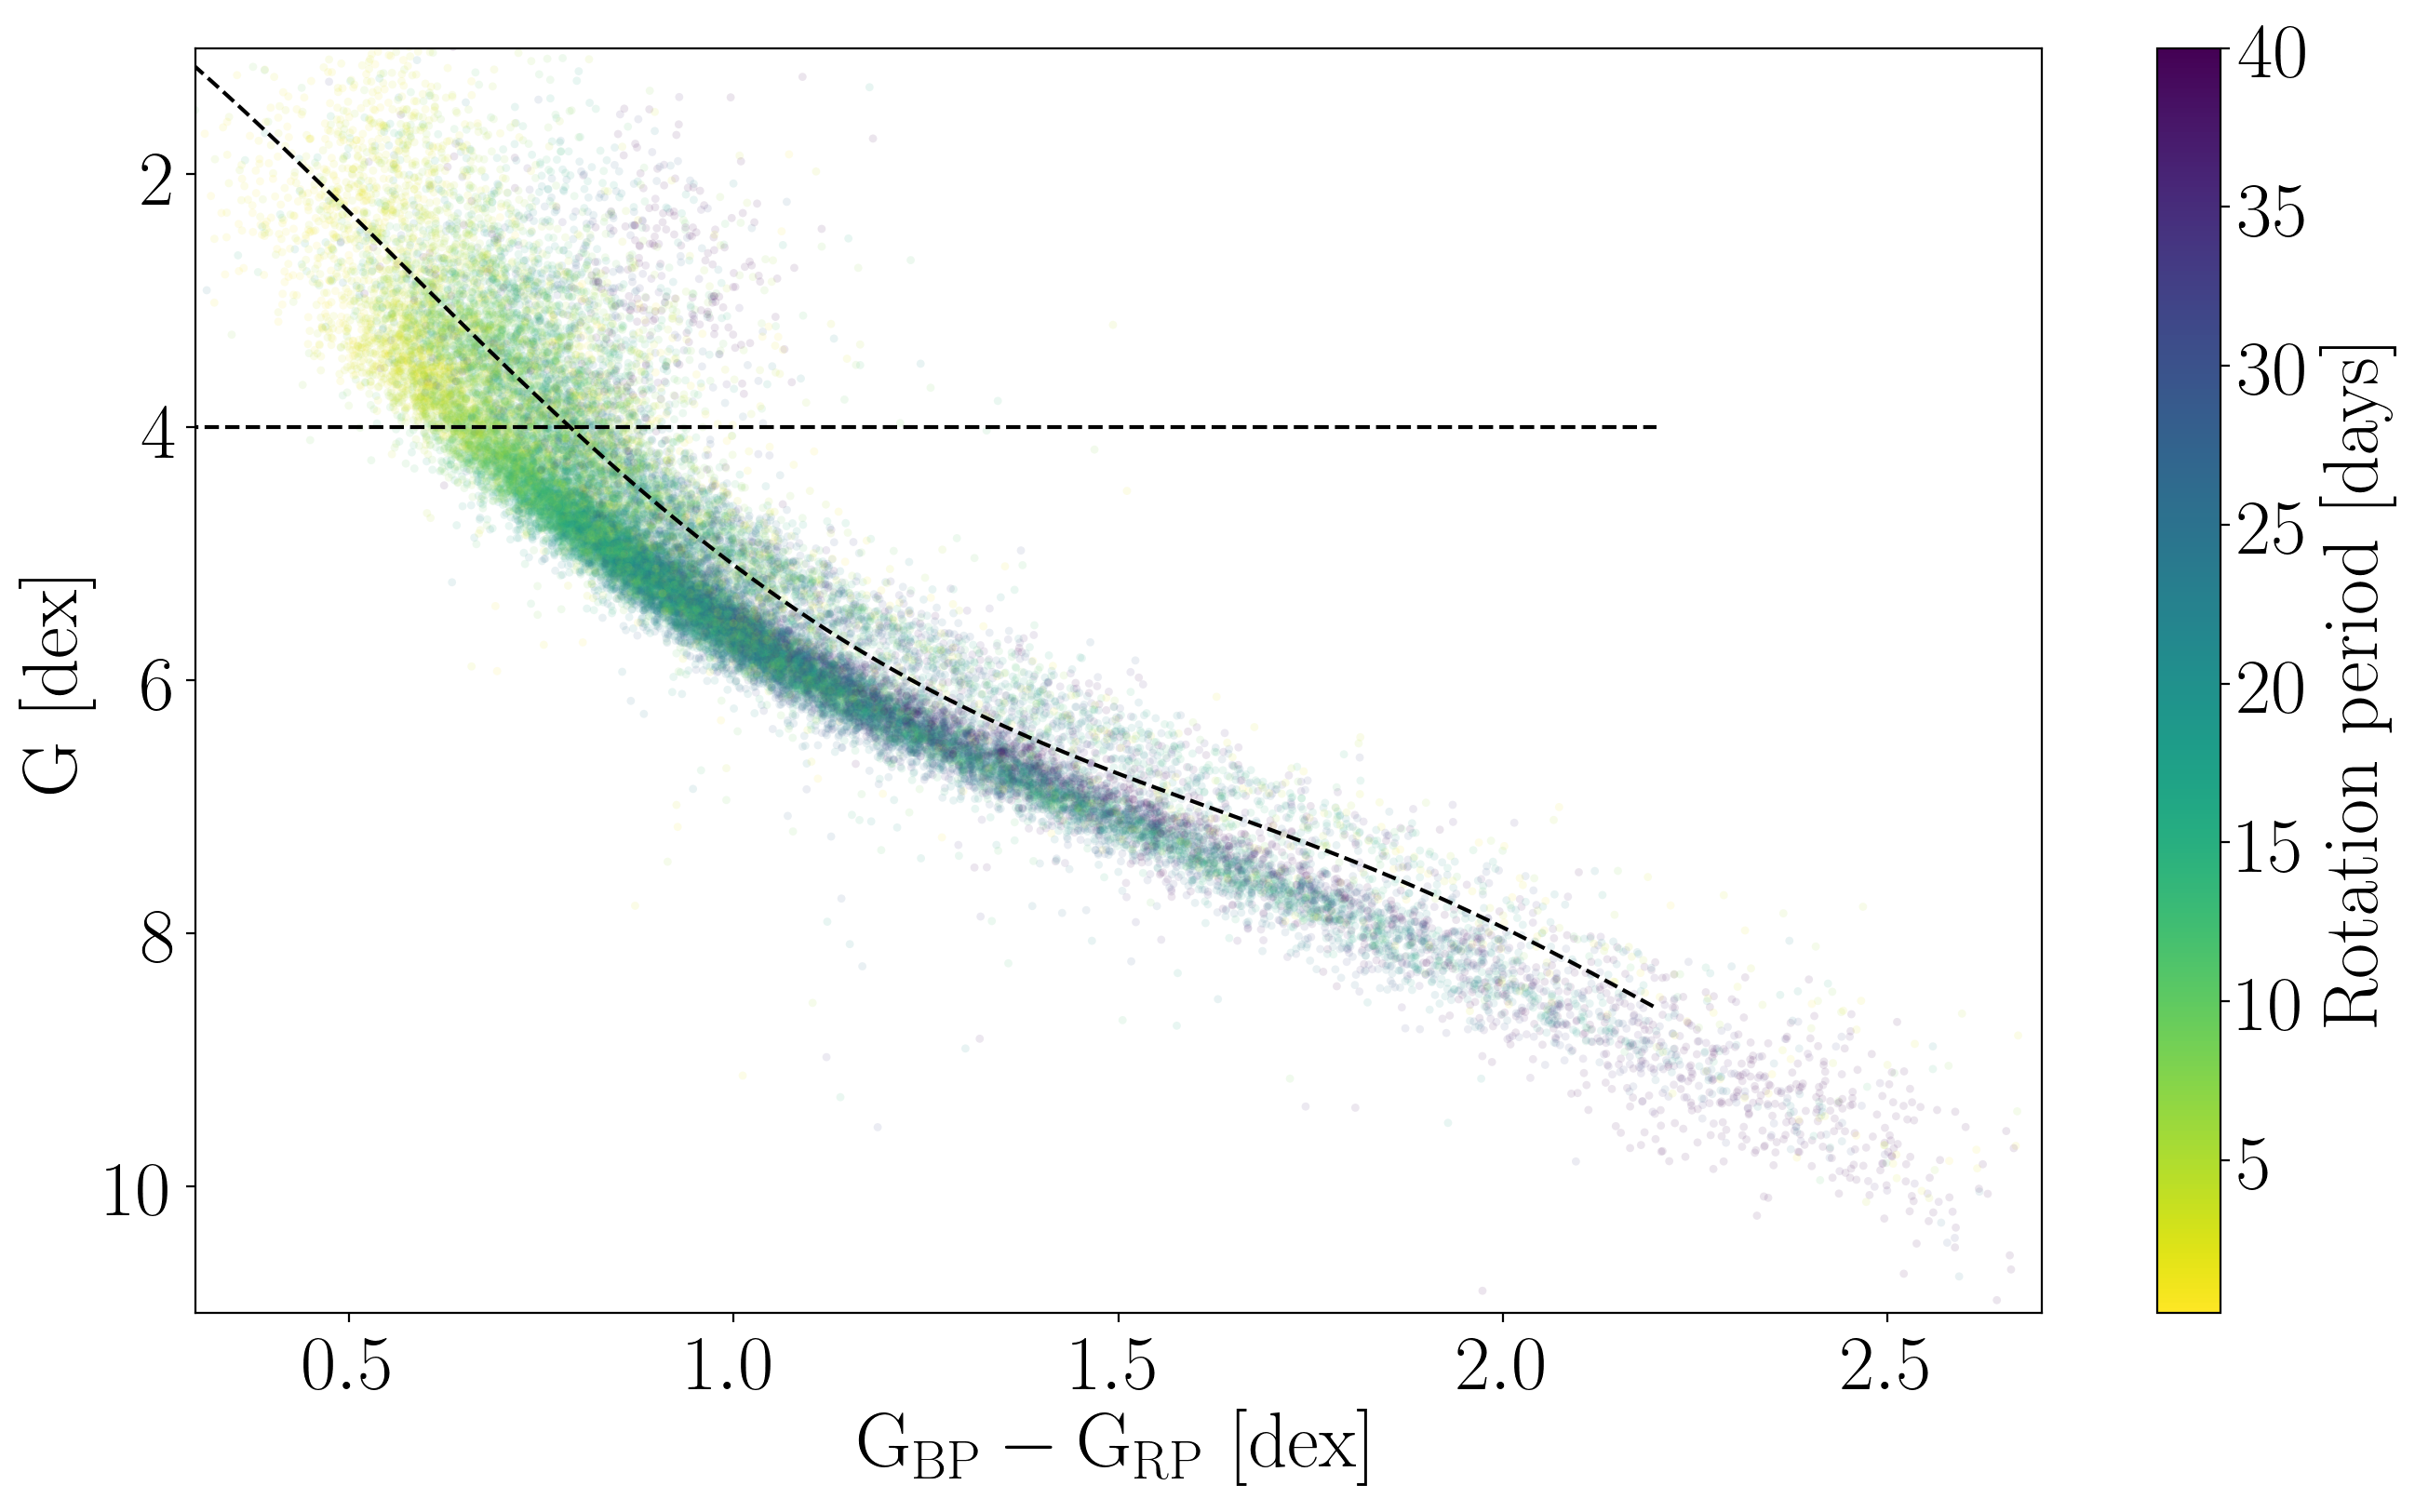

In [18]:
plt.figure(figsize=(16, 9), dpi=200)
# plt.scatter(gaia_mc.phot_bp_mean_mag - gaia_mc.phot_rp_mean_mag, gaia_mc.abs_G,
plt.scatter(gaia_mc.bp_dered - gaia_mc.rp_dered, gaia_mc.abs_G,
            c=gaia_mc.Prot, s=10, alpha=.1, cmap="viridis_r", vmax=40, rasterized=True,
            edgecolor="none")

plt.xlabel("$\mathrm{G_{BP}-G_{RP}~[dex]}$")
plt.ylabel("$\mathrm{G~[dex]}$")
color_bar = plt.colorbar(label="$\mathrm{Rotation~period~[days]}$")
color_bar.set_alpha(1)
color_bar.draw_all()
# plt.colorbar(label="$\mathrm{Rotation~period~[days]}$")
plt.ylim(11, 1)
plt.xlim(.3, 2.7);

x = gaia_mc.bp_dered - gaia_mc.rp_dered
y = gaia_mc.abs_G

AT = np.vstack((x**6, x**5, x**4, x**3, x**2, x, np.ones_like(x)))
ATA = np.dot(AT, AT.T)
w = np.linalg.solve(ATA, np.dot(AT, y))

minb, maxb, extra = 0, 2.2, .27
xs = np.linspace(minb, maxb, 1000)
plt.plot(xs, np.polyval(w, xs) - extra, "k--")
subcut = 4
plt.plot(xs, np.ones_like(xs)*subcut, "k--")

Make a double-panelled figure.

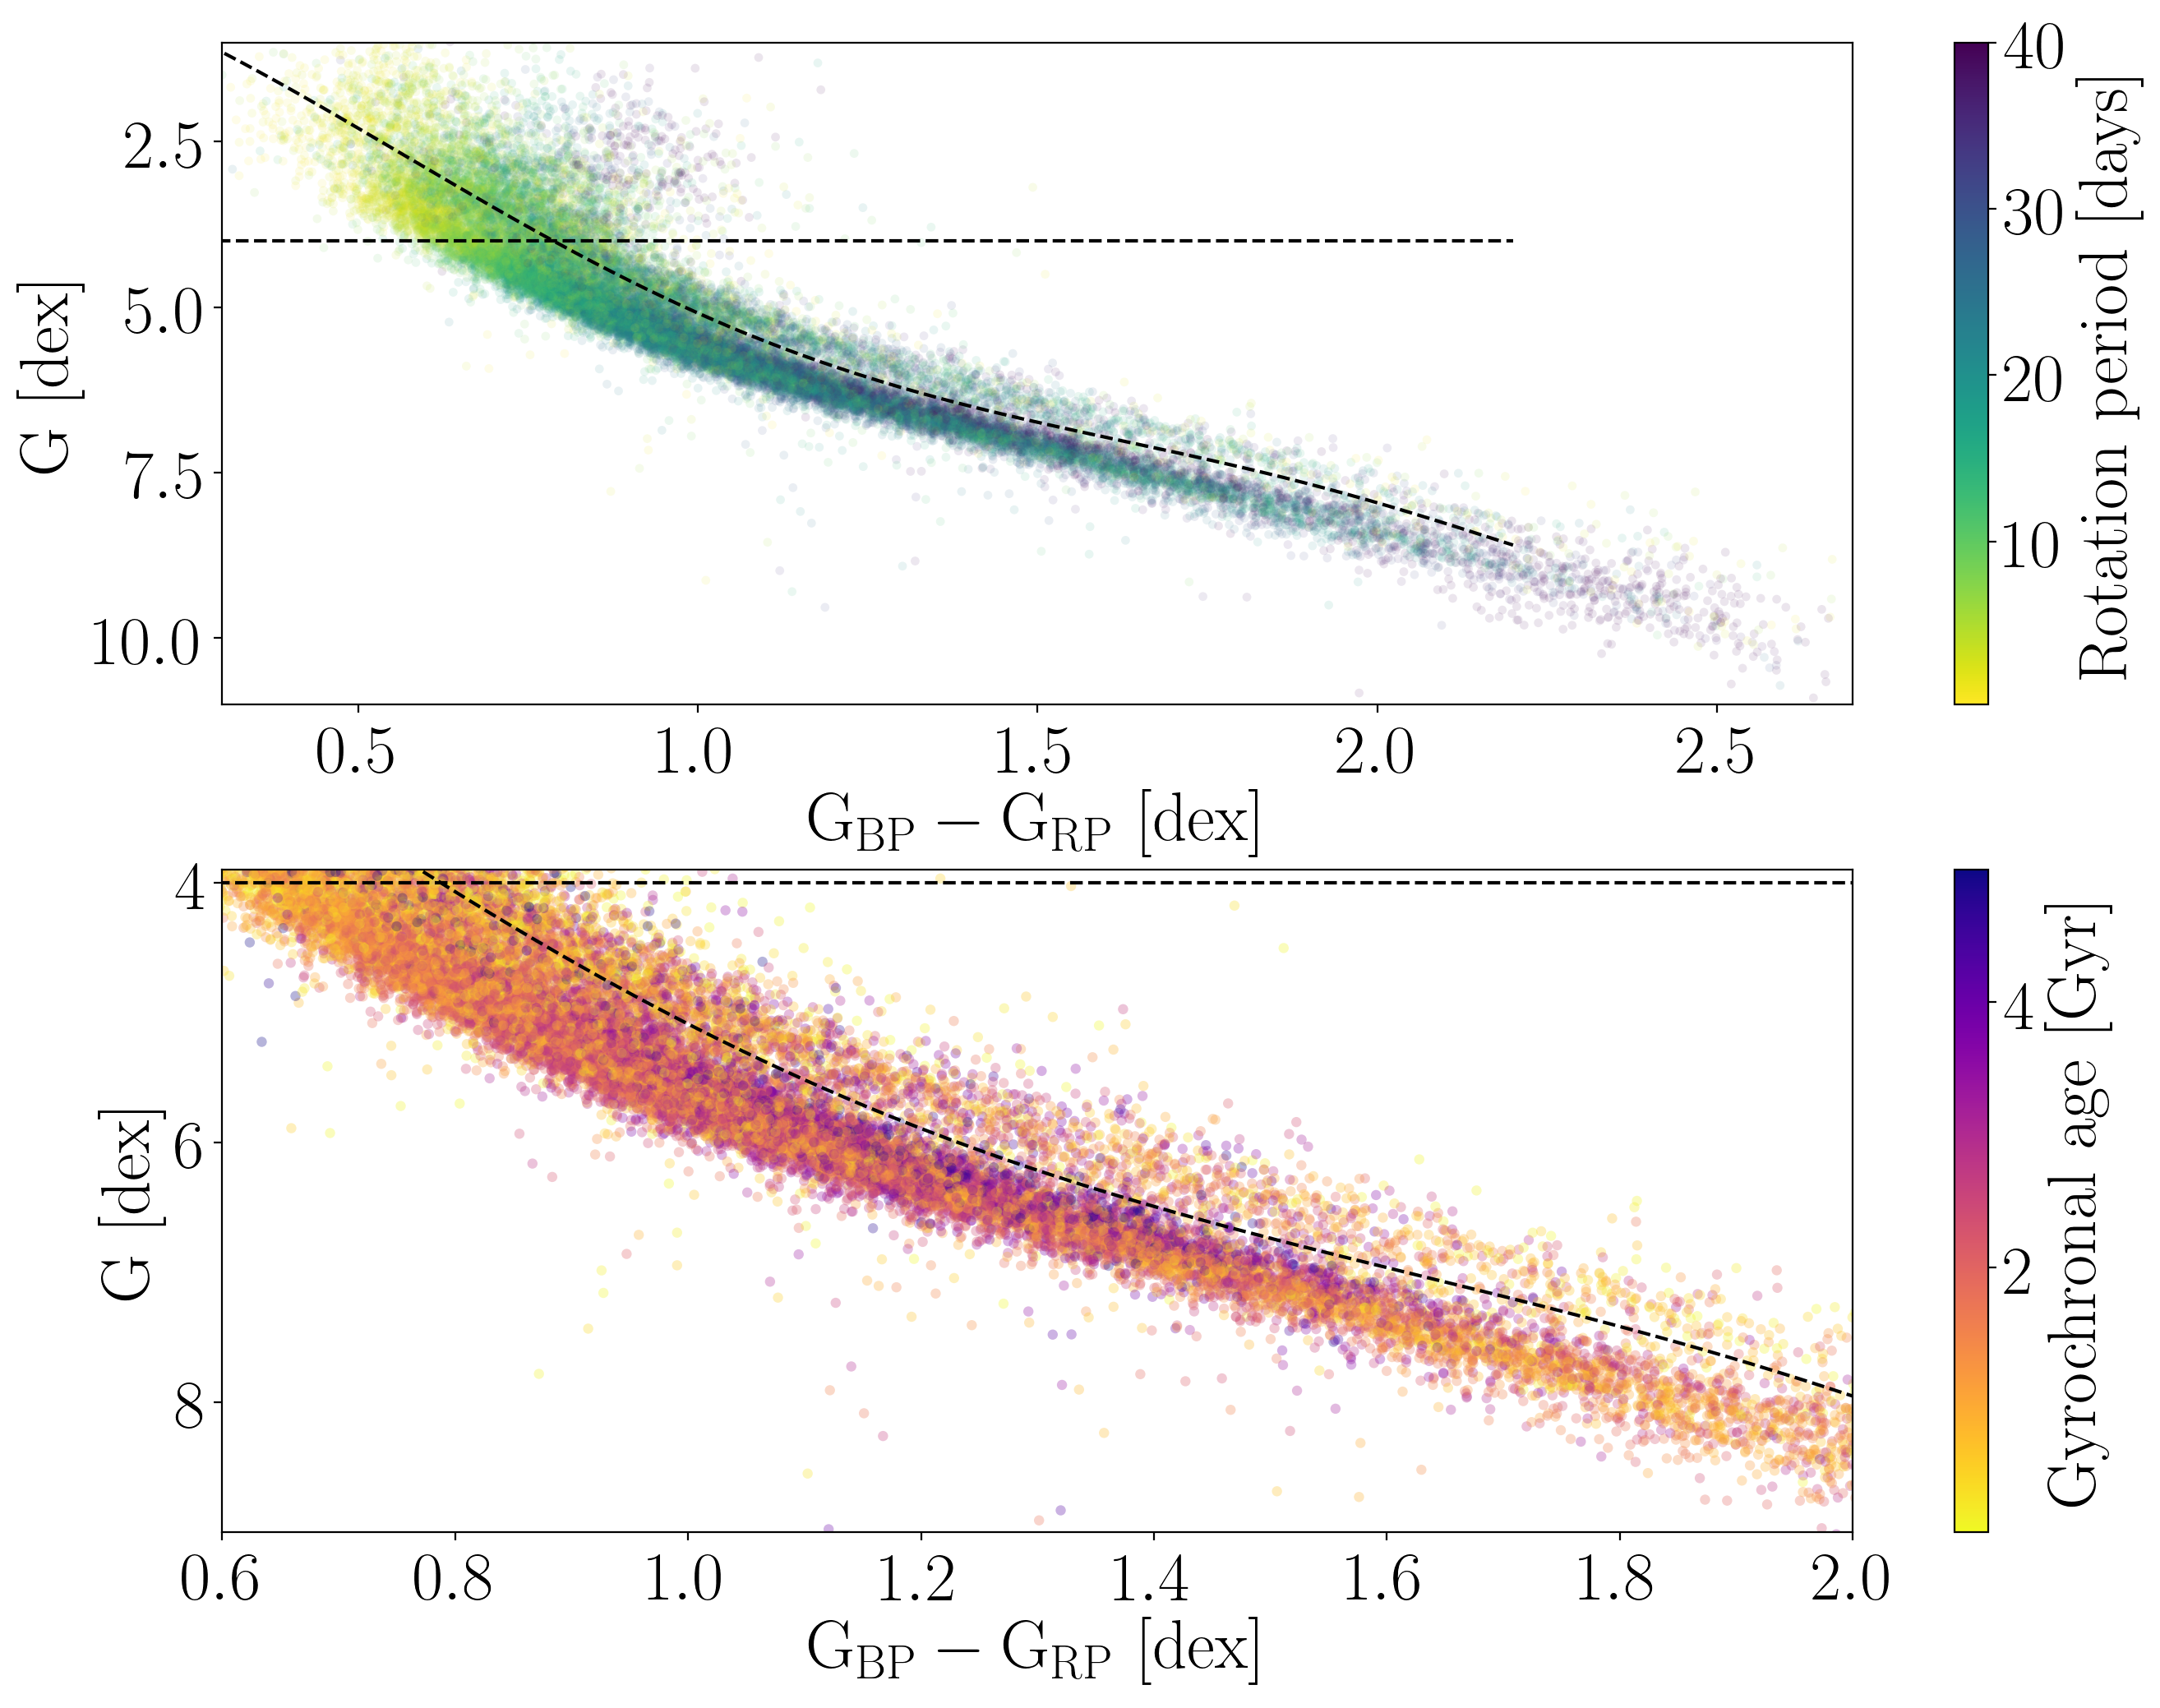

In [45]:
fig = plt.figure(figsize=(16, 12), dpi=200)
ax1 = fig.add_subplot(211)

cb = ax1.scatter(gaia_mc.bp_dered - gaia_mc.rp_dered, gaia_mc.abs_G,
            c=gaia_mc.Prot, s=15, alpha=.1, cmap="viridis_r", vmax=40, rasterized=True,
            edgecolor="none")

ax1.set_xlabel("$\mathrm{G_{BP}-G_{RP}~[dex]}$")
ax1.set_ylabel("$\mathrm{G~[dex]}$")
color_bar = plt.colorbar(cb, label="$\mathrm{Rotation~period~[days]}$")
color_bar.set_alpha(1)
color_bar.draw_all()
ax1.set_ylim(11, 1)
ax1.set_xlim(.3, 2.7);

x = gaia_mc.bp_dered - gaia_mc.rp_dered
y = gaia_mc.abs_G

AT = np.vstack((x**6, x**5, x**4, x**3, x**2, x, np.ones_like(x)))
ATA = np.dot(AT, AT.T)
w = np.linalg.solve(ATA, np.dot(AT, y))

minb, maxb, extra = 0, 2.2, .27
xs = np.linspace(minb, maxb, 1000)
ax1.plot(xs, np.polyval(w, xs) - extra, "k--")
subcut = 4
ax1.plot(xs, np.ones_like(xs)*subcut, "k--")

ax2 = fig.add_subplot(212)
cb = ax2.scatter(gaia_mc.bp_dered - gaia_mc.rp_dered, gaia_mc.abs_G,
            c=gaia_mc.age, s=20, alpha=.3, cmap="plasma_r", vmax=5, rasterized=True,
            edgecolor="none")

ax2.set_xlabel("$\mathrm{G_{BP}-G_{RP}~[dex]}$")
ax2.set_ylabel("$\mathrm{G~[dex]}$")
color_bar = plt.colorbar(cb, label="$\mathrm{Gyrochronal~age~[Gyr]}$")
color_bar.set_alpha(1)
color_bar.draw_all()
ax2.set_ylim(9, subcut-.1)
ax2.set_xlim(.6, 2);
ax2.plot(xs, np.polyval(w, xs) - extra, "k--")
ax2.plot(xs, np.ones_like(xs)*subcut, "k--")

plt.subplots_adjust(hspace=.25)
# plt.tight_layout()